## DecisionTreeClassifier의 주요 파라미터

In [43]:
# min_samples_split : 노드 분할을 위한 최소 샘플 데이터수, 디폴트는 2
# min_samples_leaf : 말단 노드가 되기 위한 최소 샘플 데이터수
# max_features : 최적 분할을 위해 고려할 최대 피처 개수, 디폴트는 None
# max_depth : 트리의 최대 깊이 규정, 디폴트는 None이나 깊이가 깊을 수록 과적합 가능성 높음
# max_leaf_nodes : 말단 노드의 최대 개수

## Graphviz를 활용, 결정트리모델 시각화

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)
# 붓꽃 데이터를 로딩, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [45]:
from sklearn.tree import export_graphviz

# export_graphciz()의 호출 결과로 out_file로 저장된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names,\
               feature_names = iris_data.feature_names, impurity=True, filled=True)

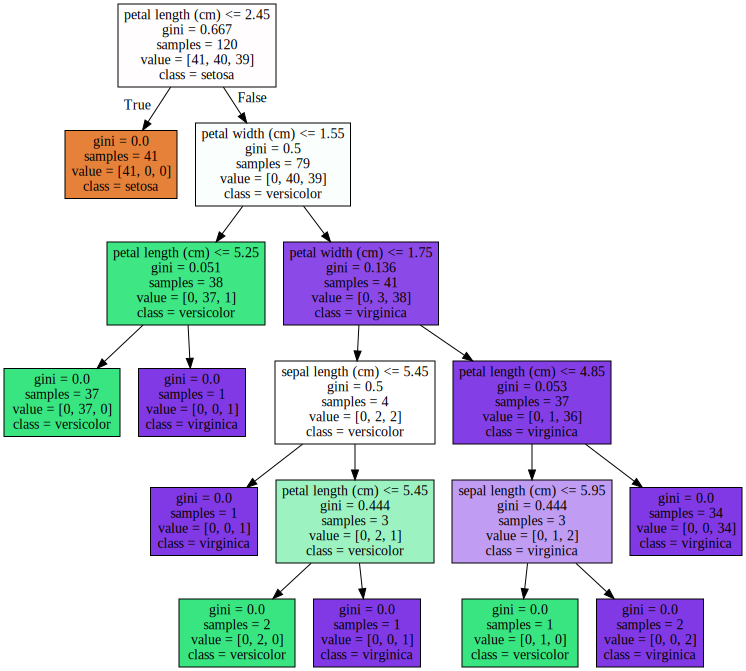

In [46]:
import graphviz
# 위에서 생성된 tree.dot파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [47]:
# 루트노드
#    samples : 현재 노드에 속한 데이터의 갯수
#    value : 레이블 별 데이터 갯수(= value_counts())
#    gini : 지니계수
#    petal length(cm) <= 2.45 : 자식 노드 생성 기준
#    class : 현재 노드에 속한 데이터들 중 다수를 차지하는 레이블
#    자식노드 생성 기준에 따라 데이터를 나누는 작업을 반복, 균일도가 1에 도달하면 자식노드 생성 중단

## feature_importances_ 속성 : 데이터 분할 시 각 피처의 중요도

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


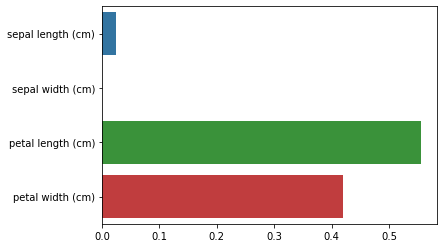

In [48]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print(f'Feature importances:\n{np.round(dt_clf.feature_importances_,3)}')

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')

# feature importance를 column 별로 시각화
sns.barplot(x = dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정 트리 과적합(Overfitting)

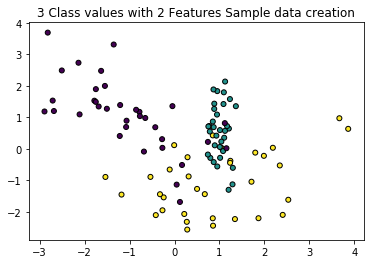

In [49]:
# 분류를 위한 테스트용 데이터셋을 쉽게 만들 수 있는 모듈
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,\
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [50]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

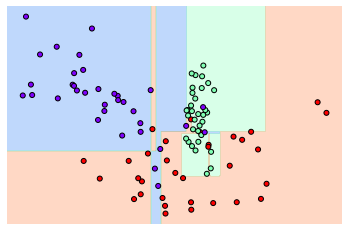

In [51]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 결정트리의 기본 하이퍼 파라미터는 분할 조건이 엄격해서 결정 기준 경계가 매우 복잡 (outlier까지 모두 분할) -> 과적합 발생

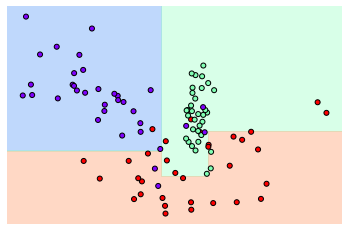

In [52]:
# min_samples_leaf를 6으로 제한

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 사용자 행동 인식 데이터 세트를 이용한 결정 트리 실습

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DFM으로 로드
feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+',\
                             header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [54]:
# 중복 피처명 확인

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [55]:
# 중복 피처명에 대해 새로운 피처명을 부여하는 함수 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = \
        new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [56]:
# train, test 데이터를 DFM화 하는 함수 생성

import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리 되어있으므로 sep = '\s+'
    feature_name_df = pd.read_csv('human_activity/features.txt', sep = '\s+',\
                                 header=None, names = ['column_index', 'column_name'])
    
    # get_new_feature_name_df()을 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명 feature_name적용
    X_train = pd.read_csv('human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블 데이터세트와 테스트 레이블 데이터를 DataFrame으로 로딩, 칼럼명 feature_name적용
    y_train = pd.read_csv('human_activity/train/y_train.txt', sep='\s+', header = None, names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep='\s+', header = None, names=['action'])
    
    # 로드학습/테스트을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [57]:
print(X_train.shape)
X_train.head()

(7352, 561)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [58]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [59]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [60]:
# 동작 예측 분류 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 roadom_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'결정 트리 예측 정확도:{accuracy:.4f}')

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 :\n', dt_clf.get_params())

결정 트리 예측 정확도:0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [61]:
# GridSearchCV를 활용 최적 하이퍼파라미터 search

from sklearn.model_selection import GridSearchCV

# 5개의 세트로 7개의 max_depth를 테스트
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치:{grid_cv.best_score_:.4f}')
print('GridSearchCV 최적 하이퍼파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.6min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼파라미터: {'max_depth': 16}


In [62]:
# GridSearchCV 객체의 cv_results_ 속성을 DFM으로 생성

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [63]:
# cv를 나누지 않고 train, test 데이터에 max_depth를 제한

max_depths = [6,8,10,12,16,20,24]

# max_depth값을 변화시키면서 그대마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'max_depth = {depth} 정확도 : {accuracy:.4f}')

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [64]:
# max_depth와 min_samples_split 동시에 최적 하이퍼파라미터 찾기
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv = 5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치:{grid_cv.best_score_:.4f}')
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [65]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(f'결정트리 예측 정확도:{accuracy:.4f}')

결정트리 예측 정확도:0.8717


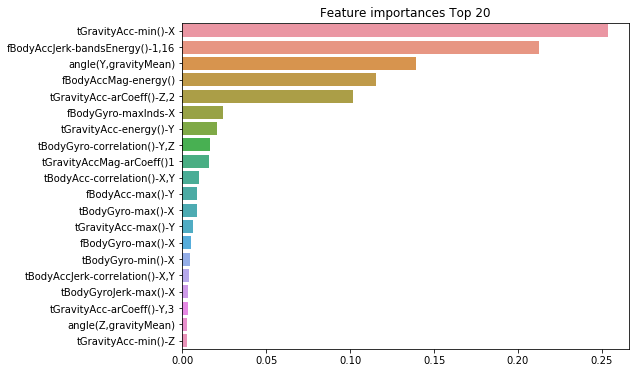

In [66]:
# 결정 트리에서 각 피처의 중요도 확인

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 보팅(Voting)
    서로다른 알고리즘을 가진 분류기들이 투표를 통해 결괏값을 최종 예측하는 방식

In [67]:
# 보팅으로 위스콘신 유방암 데이터세트 예측 분석

import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
# 로지스틱 회귀, KNN 분류기 호출
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구형한 분류기
# voting의 디폴트는 hard
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(f'Voting 분류기 정확도 : {accuracy_score(y_test, pred):.4f}')

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도 : {accuracy_score(y_test, pred):.4f}')

# vo_clf는 여러개의 분류기로 예측한 것이고, lr_clf, knn_clf는 하나의 분류기로 예측
# Voting 분류기의 성능이 개별분류기보다 낮을 수도 있음. but 과적합등을 고려한다면 Voting이 현실 모델을 만드는데 더 적합

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


## 랜덤포레스트(RandomForest) - 배깅(Bagging)의 대표주자

In [69]:
# 랜덤포레스트로 사용자 행동 인식 데이터 예측

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()으로 학습.테스트용 dfm 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'랜덤 포레스트 정확도 : {accuracy:.4f}')

랜덤 포레스트 정확도 : 0.9253


In [70]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print(f'최고 예측 정확도:{grid_cv.best_score_:.4f}')

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9180


In [71]:
# n_estimator : 결정 트리의 갯수. 많을 수록 높은 성능을 기대할 수는 있지만 무조건 올라가는 것은 아님. 특히 많을 수록 시간소요 큼
# max_depth, min_saples_leaf, min_samples_split : DecisionTree와 동일
# max_features : DecisionTree와 동일하나 디폴트 값이 sqrt. 즉 모든 피처 수에 루트를 씌운 값

# n_jobs = -1 : 모든 CPU코어를 이용하여 모델 학습

In [72]:
# 최적의 하이퍼파라미터로 모델을 학습

rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print(f'예측 정확도:{accuracy_score(y_test,pred):.4f}')

예측 정확도:0.9165


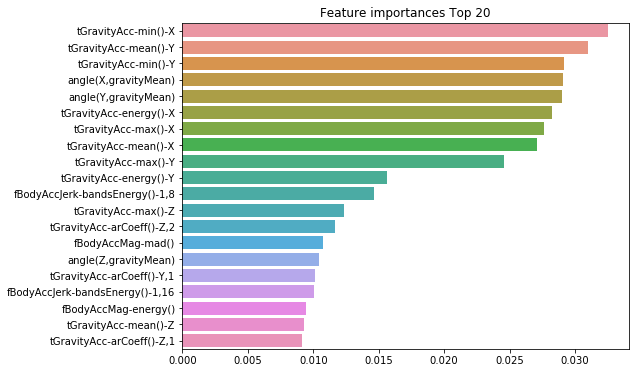

In [73]:
# 피처 중요도 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## GBM(Gradient Boost Machine) - 부스팅(Boosting)의 대표주자

In [74]:
# GBM을 이용한 사용자 행동 데이터 세트 예측 분류

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f'GBM 정확도: {gb_accuracy:.4f}')
print(f'GBM 수행시간: {time.time() - start_time}')

# 일반적으로 부스팅 방식은 배깅보다 높은 예측 성능을 기대할 수 있음 
# 하지만 랜덤포레스트는 모든 CPU를 활용 병렬 처리가 가능하지만 GBM은 순차처리 방식이므로 병렬처리가 불가
# 부스팅 또한 트리기반 알고리즘이므로 하이퍼 파라미터가 많은 것도 문제
# 대용량 데이터 학습시 GBM을 비롯한 부스팅은 수행시간에 있어 큰 단점을 보임

GBM 정확도: 0.9382
GBM 수행시간: 640.0394244194031


In [75]:
# GridSearchCV로 하이퍼파라미터 최적화
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print(f'최고 예측 정확도:{grid_cv.best_score_:.4f}')

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 64.2min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도:0.9013


#### GBM 주요 파라미터
    1) loss : 경사하강법에서 사용할 비용함수 지정. 기본값은 deviance
    2) learning_rate : 학습을 진행할 때마다 weak learner가 순차적으로 오류값을 보정해 나가는데 적용하는 계수
                       기본값은 0.1이고 작을수록 예측성능이 높아지지만 수행시간이 오래걸림
    3) n_estimators : weak learner의 갯수 기본값은 100개 증가할수록 오래걸림
    4) subsample : 각 weak learner의 데이터 샘플링 비율 기본값은 1 (전부사용)

In [76]:
# 최적으로 학습된 estimator로 예측 수행

gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'GBM 정확도:{gb_accuracy:.4f}')

GBM 정확도:0.9396


## XGBoost(eXtra Gradient Boost) : 부스팅의 떠오르는 강자 1

In [77]:
# XGBoost 설치 확인

import xgboost as xgb
from xgboost import XGBClassifier
print(xgb.__version__)

0.90


#### 파이썬 래퍼 XGBoost로 위스콘신 유방암 예측

In [78]:
# 주요 파라미터
#    * 파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost 모듈의 일부 하이퍼파라미터가 기능은 동일하나 이름이 다른 경우가 있음
#    * 기준은 파이썬 래퍼 XGBoost이며 사이킷런과 이름이 다를 경우 아래에서 표기

# 1) 주요 일반 파라미터
#    - booster : gbtree / gblinear 중 택 디폴트는 gbtree
#    - silent : 출력메시지를 나타내고 싶으면 1 아니면 0(디폴트)
#    - nthread : CPU실행 스레드 갯수 조정. 디폴트는 전체 스레드 이용

# 2) 주요 부스트 파라미터
#    - eta : learning rate를 조정. 파이썬 래퍼 모듈에선 디폴트 0.3, 0.01~0.2 사이를 선호 
#    - num_boost_rounds : n_estimators와 동일. weak learner의 갯수 설정
#    - min_child_weight : 과적합 조절을 위해 추가적으로 가지를 나눌지를 경정하기 위해 필요한 데이터들의 weight총합. 디폴트는 1, 클수록 분할자제
#    - gamma[default=0, alias: mins_split_loss]: 리프노드를 추가적으로 나눌지 결정하는 최소 손실 감소 값. 값이 클수록 과적합 감소
#    - max_depth[default=6] : 트리의 최대 깊이. 0을 지정하면 깊이 제한x, 3~10 사이값 선호
#    - sub_sample[default=1] : 각 weak learner의 데이터 샘플링 비율. 0.5~1 사이값 선호
#    - colsample_bytree[default=1] : 트리생성에 필요한 피처를 임의로 샘플링. 피처가 너무 많을 시 과적합 조정용
#    - lambda[default=1, alias:reg_lambda] : L2 Regularization 적용값. 피처수가 너무 많을 때 활용. 과적합 감소효과
#    - alpha[default=0, alias:reg_alpha] : L1 Regularization 적용값. lambda와 동일
#    - scale_pos_weight[default=1] : 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

# 3) 학습태스크 파라미터
#    - objective : 최솟값을 가져야할 손실함수 정의
#    - binary:logistic : 이진분류일 떄 적용
#    - mulit:softmax: 다중분류일때 적용
#    - multi:softprob : 개별 레이블 클래스의 해당되는 예측 확률 반환
#    - eval_metric : 검증에 사용되는 함수 정의. 회귀는 rmse, 분류는 error가 기본값
#                    rmse, mae, logloss, error, merror, mlogloss, auc가 있음


In [79]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
print(cancer_df.shape)
cancer_df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [80]:
# 악성(malignant)일 경우 0, 양성(benign)일 경우 1
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [81]:
# 학습 테스트 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [82]:
# 파이썬 래퍼 모듈은 판다스의 DFM 객체로 된 학습, 테스트용 데이터셋을 별도의 DMatrix 객체로 바꿀 필요가 있음

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [83]:
# 하이퍼 파라미터 설정

# early_stoppings : 조기종료 파라미터 
#   -> 어떤 하이퍼 파라미터를 기준으로 이후 n개의 값이 예측 성능을 향상시키지 못하면 num_boost_round 횟수를 채우지 않고 조기종료
# early_stoppings 설정 시 eval_set과 eval_metric을 반드시 함께 설정

params = {'max_depth':3,
         'eta':0.1,
         'objective':'binary:logistic',
         'eval_metric':'logloss',
         'early_stoppings':100}
num_rounds = 400

In [84]:
# eval_set설정 : train 데이터셋은 'train', evaluation(test) 데이터셋은 'eval'로 명기
wlist = [(dtrain, 'train'), (dtest, 'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds,\
                    early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

[161]	train-logloss:0.007261	eval-logloss:0.088013
[162]	train-logloss:0.007241	eval-logloss:0.087758
[163]	train-logloss:0.007221	eval-logloss:0.087784
[164]	train-logloss:0.0072	eval-logloss:0.087777
[165]	train-logloss:0.00718	eval-logloss:0.087517
[166]	train-logloss:0.007161	eval-logloss:0.087542
[167]	train-logloss:0.007142	eval-logloss:0.087642
[168]	train-logloss:0.007122	eval-logloss:0.08739
[169]	train-logloss:0.007103	eval-logloss:0.087377
[170]	train-logloss:0.007084	eval-logloss:0.087298
[171]	train-logloss:0.007065	eval-logloss:0.087368
[172]	train-logloss:0.007047	eval-logloss:0.087395
[173]	train-logloss:0.007028	eval-logloss:0.087385
[174]	train-logloss:0.007009	eval-logloss:0.087132
[175]	train-logloss:0.006991	eval-logloss:0.087159
[176]	train-logloss:0.006973	eval-logloss:0.086955
[177]	train-logloss:0.006955	eval-logloss:0.087053
[178]	train-logloss:0.006937	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.086973
[180]	train-logloss:0.006901	eval-log

In [85]:
# xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환 (pred_proba 형식)
#  -> 예측확률 0.5이상일 시 악성으로 판단하는 로직을 추가하여 사이킷 런의 predict()와 동일하게 만들어줌

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [86]:
# 평가 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print추가
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

In [87]:
# xgboost 모델의 예측성능 평가
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1:0.9806, AUC:0.9951


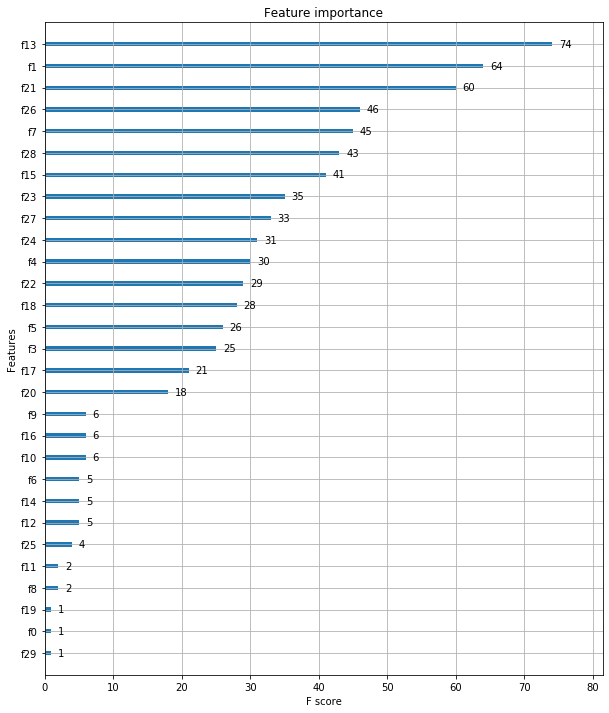

In [88]:
# 피처 중요도 시각화
# plot_importance() : 사이킷런과 달리 피처 중요도 시각화 함수가 내장, 단 넘파이 기반이기 때문에 피처명이 표현되지는 않음

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

#### 사이킷런 래퍼 XGBoost로 위스콘신 유방암 예측

In [89]:
# 파이썬 래퍼 파라미터에서 몇개만 이름이 바뀜

# eta -> learning_late (사이킷런에서는 디폴트 0.1)
# sub_sample -> subsample
# lambda -> reg_lambda
# alpha -> reg_alpha
# num_boost_round는 사용하지 않고 n_estimators 파라미터만 사용

In [90]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
print(cancer_df.shape)
cancer_df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [91]:
# 학습 테스트 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [92]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
# 파이썬 래퍼와 달리 사이킷런 래퍼에서는 fit, predict 함수를 다른 사이킷런 알고리즘과 동일하게 사용
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [93]:
# 평가 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print추가
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')
    
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1:0.9806, AUC:0.9951


In [94]:
# 수행속도 향상을 위해서 조기중단을 해야한다면 다음과 같은 코드를 사용
# 단 평가를 위한 데이터 세트로는 완전히 새로운 데이터 세트를 사용하는 것이 바람직함(과적함 방지)/
# 하지만 이 예제에서는 데이터 크기가 작으므로 테스트 데이터 세트를 평가용으로 사용

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [95]:
# 조기 중단으로 학습된 XGBClassifier의 에측성능
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1:0.9744, AUC:0.9954


In [96]:
# 조기 중단값을 너무 작게 설정하면 예측 성능 저하 확률 증가

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, ws10_preds, ws100_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


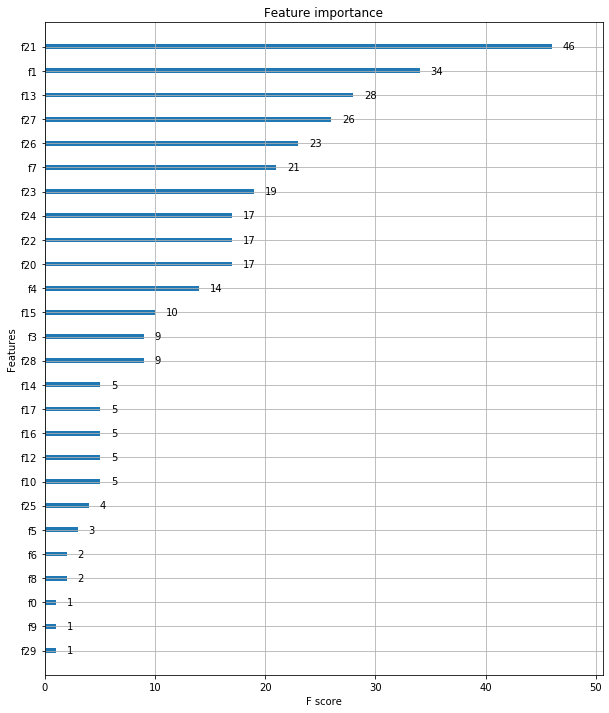

In [97]:
# 사이킷런 래퍼 클래스에서도 plot_importance()함수로 피처 중요도 시각화가능

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)

## LightGBM : 부스팅의 떠오르는 강자 2

#### 주요 파라미터

In [98]:
# num_terations [default=100] : n_estimators와 동일, 사이킷런 호환클래스에선 n_estimators로 대체
# learning_rate [default=0.1] : 부스팅을 반복 수행할 때 업데이트 되는 학습률
# max_depth [default=-1] : 과적합때문에 깊이를 제한하는 다른 gbm계열과 달리 LightGBM은 Leafwise 방식이어서 상대적으로 큰 값을 줌
# min_data_in_leaf [default=20] : 리프 노드가 되기 위해 최소한으로 필요한 레코드수. 사이킷런 클래스에선 min_child_samples로 대체
# num_leaves [default=31] : 하나의 트리가 가질 수 있는 최대 리프 개수
# boosting [default=gbdt] : 트리 생성 알고리즘 (gbrt: 그래디언트 부스팅 결정 트리, rf : 랜덤 포레스트)
# bagging_fraction [default=1.0] : 데이터 샘플링 비율, 사이킷런 클래스에선 subsample
# feature_fraction [default=1.0] : 각 트리별 무작위로 선택하는 피처의 비율, 사이킷런 클래스에선 colsample_bytree
# lambda_l2 [default=0.0] : L2 Regulation 제어를 위한 값 (피처 개수가 많을 때 적용), 사이킷런 클래스에선 reg_lambda
# lambda_l1 [default=0.0] : L1 Regulation 제어를 위한 값 (피처 개수가 많을 때 적용), 사이킷런 클래스에선 reg_alpha

# objective : 최솟값을 가져야 할 손실함수 정의

#### LightGBM으로 위스콘신 유방암 예측하기

In [99]:
# LightGBM의 파이썬 패키지 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 학습용 테스트용 데이터 split
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# n_estimators 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# 조기중단 수행
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

In [100]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740, F1:0.9615, AUC:0.9926


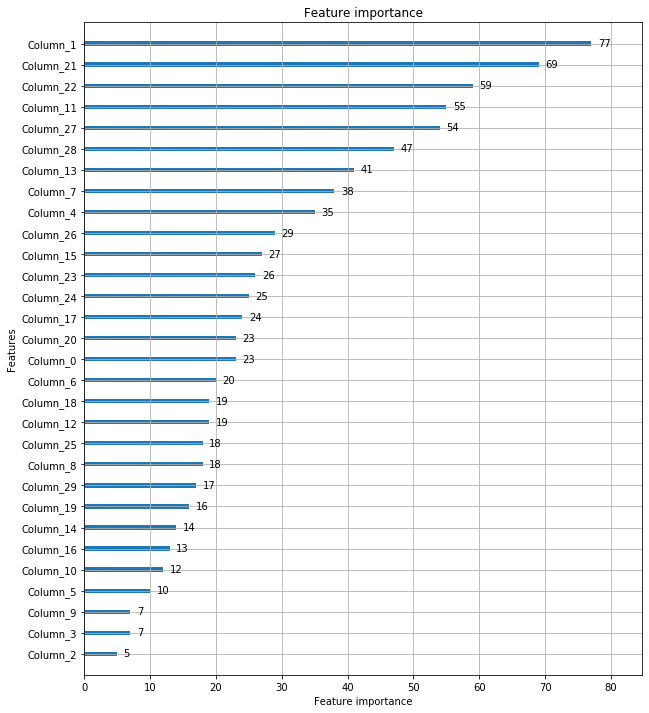

In [101]:
# 피처 중요도 시각화

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

## 캐글 산탄데르 고객 만족 예측

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cust_df = pd.read_csv('santander/train.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [103]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [104]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df.loc[cust_df['TARGET']==1,'TARGET'].count()
total_cnt = cust_df['TARGET'].count()
print(f'unsatisfied 비율은 {unsatisfied_cnt/total_cnt:.2f}')

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [105]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [106]:
# NaN값으로 추정되는 -999999을 가장 많이 나오는 2로 교체
cust_df['var3'].replace(-999999, 2, inplace=True)
# 식별자 칼럼 제거
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리
X_features = cust_df.iloc[:,:-1]
y_label = cust_df.iloc[:,-1]
print(f'피처 데이터 shape:{X_features.shape}')

피처 데이터 shape:(76020, 369)


In [107]:
# 학습 / 테스트용 데이터 split

from sklearn.model_selection import train_test_split

# 더 균등한 데이터 split을 위해선 stratify=y_label 옵션을 넣어도 좋을듯?
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(f'학습세트 shape:{X_train.shape}, 테스트세트 shape:{X_test.shape}')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습세트 shape:(60816, 369), 테스트세트 shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


#### XGBoost로 예측하기

In [108]:
# XGBoost 모델 학습 및 하이퍼 파라미터 튜닝

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# 트리의 갯수는 500
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)

# 성능 평가 지표는 auc, 조기 중단 파라미터 100으로 설정
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC : {xgb_roc_score :.4f}')

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [109]:
# 하이퍼 파라미터 튜닝 수행

# 시간 소요가 많은 ML모델일 경우 2~3개 파라미터를 먼저 결합하여 최적 하이퍼파라미터를 찾고 추가적으로 파라미터를 조합하는 방식을 사용할것

from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도 향상을 위해 트리의 갯수 100개로 제한
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth' : [5,7],
         'min_child_weight' : [1,3],
         'colsample_bytree' : [0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.82674

[51]	validation_0-auc:0.86387	validation_1-auc:0.843007
[52]	validation_0-auc:0.864428	validation_1-auc:0.843608
[53]	validation_0-auc:0.86492	validation_1-auc:0.843887
[54]	validation_0-auc:0.865341	validation_1-auc:0.844128
[55]	validation_0-auc:0.865713	validation_1-auc:0.843955
[56]	validation_0-auc:0.866165	validation_1-auc:0.844301
[57]	validation_0-auc:0.866538	validation_1-auc:0.84439
[58]	validation_0-auc:0.86671	validation_1-auc:0.844055
[59]	validation_0-auc:0.866977	validation_1-auc:0.843974
[60]	validation_0-auc:0.867483	validation_1-auc:0.8439
[61]	validation_0-auc:0.867853	validation_1-auc:0.843561
[62]	validation_0-auc:0.86811	validation_1-auc:0.843594
[63]	validation_0-auc:0.868319	validation_1-auc:0.843498
[64]	validation_0-auc:0.868554	validation_1-auc:0.843615
[65]	validation_0-auc:0.869021	validation_1-auc:0.843756
[66]	validation_0-auc:0.869095	validation_1-auc:0.843781
[67]	validation_0-auc:0.869277	validation_1-auc:0.843635
[68]	validation_0-auc:0.869639	validat

[1]	validation_0-auc:0.804027	validation_1-auc:0.809028
[2]	validation_0-auc:0.796929	validation_1-auc:0.805684
[3]	validation_0-auc:0.80379	validation_1-auc:0.811591
[4]	validation_0-auc:0.811904	validation_1-auc:0.818375
[5]	validation_0-auc:0.808826	validation_1-auc:0.815714
[6]	validation_0-auc:0.809236	validation_1-auc:0.816054
[7]	validation_0-auc:0.818354	validation_1-auc:0.823376
[8]	validation_0-auc:0.822085	validation_1-auc:0.826164
[9]	validation_0-auc:0.82165	validation_1-auc:0.824633
[10]	validation_0-auc:0.825876	validation_1-auc:0.828152
[11]	validation_0-auc:0.830307	validation_1-auc:0.830536
[12]	validation_0-auc:0.832494	validation_1-auc:0.831414
[13]	validation_0-auc:0.832283	validation_1-auc:0.831058
[14]	validation_0-auc:0.830152	validation_1-auc:0.829388
[15]	validation_0-auc:0.833723	validation_1-auc:0.831545
[16]	validation_0-auc:0.835902	validation_1-auc:0.833087
[17]	validation_0-auc:0.838024	validation_1-auc:0.835309
[18]	validation_0-auc:0.840344	validation_

[57]	validation_0-auc:0.863066	validation_1-auc:0.845717
[58]	validation_0-auc:0.863413	validation_1-auc:0.845678
[59]	validation_0-auc:0.863608	validation_1-auc:0.84581
[60]	validation_0-auc:0.86412	validation_1-auc:0.845891
[61]	validation_0-auc:0.864399	validation_1-auc:0.845775
[62]	validation_0-auc:0.864521	validation_1-auc:0.845851
[63]	validation_0-auc:0.864786	validation_1-auc:0.845721
[64]	validation_0-auc:0.865062	validation_1-auc:0.845821
[65]	validation_0-auc:0.865567	validation_1-auc:0.845831
[66]	validation_0-auc:0.865616	validation_1-auc:0.845926
[67]	validation_0-auc:0.865942	validation_1-auc:0.845591
[68]	validation_0-auc:0.866071	validation_1-auc:0.845562
[69]	validation_0-auc:0.866158	validation_1-auc:0.845375
[70]	validation_0-auc:0.866421	validation_1-auc:0.845291
[71]	validation_0-auc:0.866631	validation_1-auc:0.845063
[72]	validation_0-auc:0.866834	validation_1-auc:0.844927
[73]	validation_0-auc:0.867035	validation_1-auc:0.844978
[74]	validation_0-auc:0.867128	va

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.809965	validation_1-auc:0.808886
[2]	validation_0-auc:0.804423	validation_1-auc:0.807373
[3]	validation_0-auc:0.815189	validation_1-auc:0.816603
[4]	validation_0-auc:0.824234	validation_1-auc:0.823278
[5]	validation_0-auc:0.819568	validation_1-auc:0.81934
[6]	validation_0-auc:0.819199	validation_1-auc:0.818772
[7]	validation_0-auc:0.827364	validation_1-auc:0.826183
[8]	validation_0-auc:0.831947	validation_1-auc:0.829293
[9]	validation_0-auc:0.832248	validation_1-auc:0.827116
[10]	validation_0-auc:0.836511	validation_1-auc:0.829685
[11]	validation_0-auc:0.841032	validation_1-auc:0.831312
[12]	validation_0-auc:0.843673	validation_1-auc:0.831989
[13]	validation_0-auc:0.843697	validation_1-auc:0.832132
[14]	validation_0-auc:0.843356	validation_1-auc:0.830392
[15]	validation_0-auc:0.846759	validation_1-auc:0.83237

[77]	validation_0-auc:0.892957	validation_1-auc:0.844356
[78]	validation_0-auc:0.893228	validation_1-auc:0.84433
[79]	validation_0-auc:0.893375	validation_1-auc:0.844108
[80]	validation_0-auc:0.893476	validation_1-auc:0.844037
[81]	validation_0-auc:0.893656	validation_1-auc:0.844067
[82]	validation_0-auc:0.893838	validation_1-auc:0.843845
[83]	validation_0-auc:0.894993	validation_1-auc:0.84388
[84]	validation_0-auc:0.895174	validation_1-auc:0.843781
[85]	validation_0-auc:0.895171	validation_1-auc:0.844018
[86]	validation_0-auc:0.895293	validation_1-auc:0.843721
[87]	validation_0-auc:0.895377	validation_1-auc:0.843689
[88]	validation_0-auc:0.895614	validation_1-auc:0.8435
[89]	validation_0-auc:0.895597	validation_1-auc:0.84341
[90]	validation_0-auc:0.896023	validation_1-auc:0.843738
[91]	validation_0-auc:0.896194	validation_1-auc:0.843675
[92]	validation_0-auc:0.896304	validation_1-auc:0.843666
[93]	validation_0-auc:0.896388	validation_1-auc:0.8436
[94]	validation_0-auc:0.89645	validati

[17]	validation_0-auc:0.85058	validation_1-auc:0.835537
[18]	validation_0-auc:0.852488	validation_1-auc:0.836913
[19]	validation_0-auc:0.851413	validation_1-auc:0.83678
[20]	validation_0-auc:0.853824	validation_1-auc:0.837786
[21]	validation_0-auc:0.853711	validation_1-auc:0.836986
[22]	validation_0-auc:0.852989	validation_1-auc:0.835059
[23]	validation_0-auc:0.855112	validation_1-auc:0.836803
[24]	validation_0-auc:0.856859	validation_1-auc:0.838802
[25]	validation_0-auc:0.85723	validation_1-auc:0.83782
[26]	validation_0-auc:0.857535	validation_1-auc:0.836375
[27]	validation_0-auc:0.85929	validation_1-auc:0.837784
[28]	validation_0-auc:0.860972	validation_1-auc:0.837979
[29]	validation_0-auc:0.860682	validation_1-auc:0.837827
[30]	validation_0-auc:0.862143	validation_1-auc:0.838806
[31]	validation_0-auc:0.863184	validation_1-auc:0.839024
[32]	validation_0-auc:0.863638	validation_1-auc:0.838132
[33]	validation_0-auc:0.864268	validation_1-auc:0.838288
[34]	validation_0-auc:0.8644	validat

Stopping. Best iteration:
[65]	validation_0-auc:0.882333	validation_1-auc:0.843298

[0]	validation_0-auc:0.740963	validation_1-auc:0.745305
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.82294	validation_1-auc:0.821542
[2]	validation_0-auc:0.813813	validation_1-auc:0.809933
[3]	validation_0-auc:0.827473	validation_1-auc:0.822227
[4]	validation_0-auc:0.832393	validation_1-auc:0.826685
[5]	validation_0-auc:0.831888	validation_1-auc:0.822684
[6]	validation_0-auc:0.831945	validation_1-auc:0.821011
[7]	validation_0-auc:0.835043	validation_1-auc:0.824823
[8]	validation_0-auc:0.839917	validation_1-auc:0.82833
[9]	validation_0-auc:0.839675	validation_1-auc:0.827635
[10]	validation_0-auc:0.843606	validation_1-auc:0.829718
[11]	validation_0-auc:0.846078	validation_1-auc:0.833888
[12]	validation_0-auc:0.848075	validation_1-auc:0.834836
[13]	validation_0-auc:0.849433

[45]	validation_0-auc:0.860625	validation_1-auc:0.839082
[46]	validation_0-auc:0.860953	validation_1-auc:0.839125
[47]	validation_0-auc:0.861608	validation_1-auc:0.838995
[48]	validation_0-auc:0.862085	validation_1-auc:0.839059
[49]	validation_0-auc:0.862354	validation_1-auc:0.839387
[50]	validation_0-auc:0.862812	validation_1-auc:0.839298
[51]	validation_0-auc:0.863372	validation_1-auc:0.839127
[52]	validation_0-auc:0.864029	validation_1-auc:0.839097
[53]	validation_0-auc:0.864379	validation_1-auc:0.839118
[54]	validation_0-auc:0.864775	validation_1-auc:0.838848
[55]	validation_0-auc:0.86518	validation_1-auc:0.838897
[56]	validation_0-auc:0.865428	validation_1-auc:0.838671
[57]	validation_0-auc:0.865679	validation_1-auc:0.838451
[58]	validation_0-auc:0.866057	validation_1-auc:0.838382
[59]	validation_0-auc:0.866205	validation_1-auc:0.838363
[60]	validation_0-auc:0.866485	validation_1-auc:0.83804
[61]	validation_0-auc:0.866681	validation_1-auc:0.837604
[62]	validation_0-auc:0.867	valid

[17]	validation_0-auc:0.844972	validation_1-auc:0.836283
[18]	validation_0-auc:0.845411	validation_1-auc:0.836243
[19]	validation_0-auc:0.845623	validation_1-auc:0.837443
[20]	validation_0-auc:0.846563	validation_1-auc:0.837309
[21]	validation_0-auc:0.846794	validation_1-auc:0.837453
[22]	validation_0-auc:0.847843	validation_1-auc:0.837781
[23]	validation_0-auc:0.848615	validation_1-auc:0.838383
[24]	validation_0-auc:0.849434	validation_1-auc:0.838103
[25]	validation_0-auc:0.85036	validation_1-auc:0.838932
[26]	validation_0-auc:0.850801	validation_1-auc:0.838703
[27]	validation_0-auc:0.850936	validation_1-auc:0.837935
[28]	validation_0-auc:0.851557	validation_1-auc:0.837842
[29]	validation_0-auc:0.852139	validation_1-auc:0.837859
[30]	validation_0-auc:0.852693	validation_1-auc:0.8387
[31]	validation_0-auc:0.853579	validation_1-auc:0.838874
[32]	validation_0-auc:0.853998	validation_1-auc:0.838908
[33]	validation_0-auc:0.85455	validation_1-auc:0.839699
[34]	validation_0-auc:0.855415	vali

[59]	validation_0-auc:0.862575	validation_1-auc:0.839266
[60]	validation_0-auc:0.862755	validation_1-auc:0.839195
[61]	validation_0-auc:0.86307	validation_1-auc:0.839449
[62]	validation_0-auc:0.863241	validation_1-auc:0.839404
[63]	validation_0-auc:0.863658	validation_1-auc:0.839428
[64]	validation_0-auc:0.86375	validation_1-auc:0.839621
[65]	validation_0-auc:0.86421	validation_1-auc:0.839633
[66]	validation_0-auc:0.86447	validation_1-auc:0.839787
[67]	validation_0-auc:0.86483	validation_1-auc:0.839489
[68]	validation_0-auc:0.864976	validation_1-auc:0.839477
[69]	validation_0-auc:0.865145	validation_1-auc:0.83945
Stopping. Best iteration:
[39]	validation_0-auc:0.855169	validation_1-auc:0.840194

[0]	validation_0-auc:0.811089	validation_1-auc:0.810522
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816087	validation_1-auc:0.810073
[2]	validation_0-auc:0.822

[27]	validation_0-auc:0.85049	validation_1-auc:0.838129
[28]	validation_0-auc:0.850674	validation_1-auc:0.837812
[29]	validation_0-auc:0.851227	validation_1-auc:0.838234
[30]	validation_0-auc:0.851623	validation_1-auc:0.838185
[31]	validation_0-auc:0.852504	validation_1-auc:0.838433
[32]	validation_0-auc:0.853015	validation_1-auc:0.838103
[33]	validation_0-auc:0.8536	validation_1-auc:0.838398
[34]	validation_0-auc:0.854335	validation_1-auc:0.838896
[35]	validation_0-auc:0.854663	validation_1-auc:0.839009
[36]	validation_0-auc:0.855138	validation_1-auc:0.839035
[37]	validation_0-auc:0.855351	validation_1-auc:0.839193
[38]	validation_0-auc:0.856105	validation_1-auc:0.839668
[39]	validation_0-auc:0.856527	validation_1-auc:0.83972
[40]	validation_0-auc:0.857019	validation_1-auc:0.840403
[41]	validation_0-auc:0.8577	validation_1-auc:0.840506
[42]	validation_0-auc:0.85823	validation_1-auc:0.840863
[43]	validation_0-auc:0.858341	validation_1-auc:0.840702
[44]	validation_0-auc:0.858849	validat

[4]	validation_0-auc:0.83547	validation_1-auc:0.826685
[5]	validation_0-auc:0.840865	validation_1-auc:0.832065
[6]	validation_0-auc:0.843256	validation_1-auc:0.831047
[7]	validation_0-auc:0.844488	validation_1-auc:0.82997
[8]	validation_0-auc:0.846035	validation_1-auc:0.83064
[9]	validation_0-auc:0.847946	validation_1-auc:0.831142
[10]	validation_0-auc:0.848745	validation_1-auc:0.831627
[11]	validation_0-auc:0.850347	validation_1-auc:0.832598
[12]	validation_0-auc:0.851272	validation_1-auc:0.832519
[13]	validation_0-auc:0.853669	validation_1-auc:0.834865
[14]	validation_0-auc:0.855251	validation_1-auc:0.835849
[15]	validation_0-auc:0.856435	validation_1-auc:0.83605
[16]	validation_0-auc:0.857587	validation_1-auc:0.836177
[17]	validation_0-auc:0.859351	validation_1-auc:0.836231
[18]	validation_0-auc:0.860285	validation_1-auc:0.836331
[19]	validation_0-auc:0.860357	validation_1-auc:0.837599
[20]	validation_0-auc:0.862392	validation_1-auc:0.83764
[21]	validation_0-auc:0.862808	validation_

[63]	validation_0-auc:0.89141	validation_1-auc:0.841085
[64]	validation_0-auc:0.891682	validation_1-auc:0.841143
[65]	validation_0-auc:0.892278	validation_1-auc:0.841065
[66]	validation_0-auc:0.892727	validation_1-auc:0.840958
[67]	validation_0-auc:0.893137	validation_1-auc:0.840921
[68]	validation_0-auc:0.893388	validation_1-auc:0.840771
[69]	validation_0-auc:0.893529	validation_1-auc:0.84087
[70]	validation_0-auc:0.893802	validation_1-auc:0.840709
[71]	validation_0-auc:0.893855	validation_1-auc:0.840794
[72]	validation_0-auc:0.894019	validation_1-auc:0.840836
[73]	validation_0-auc:0.894373	validation_1-auc:0.841008
[74]	validation_0-auc:0.894542	validation_1-auc:0.840932
[75]	validation_0-auc:0.894724	validation_1-auc:0.840937
Stopping. Best iteration:
[45]	validation_0-auc:0.884335	validation_1-auc:0.842062

[0]	validation_0-auc:0.816109	validation_1-auc:0.811
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-a

[59]	validation_0-auc:0.882357	validation_1-auc:0.841579
[60]	validation_0-auc:0.882716	validation_1-auc:0.841512
[61]	validation_0-auc:0.882939	validation_1-auc:0.841415
[62]	validation_0-auc:0.883049	validation_1-auc:0.841426
[63]	validation_0-auc:0.883365	validation_1-auc:0.841612
[64]	validation_0-auc:0.883681	validation_1-auc:0.841852
[65]	validation_0-auc:0.884057	validation_1-auc:0.841847
[66]	validation_0-auc:0.884053	validation_1-auc:0.841909
[67]	validation_0-auc:0.88446	validation_1-auc:0.841985
[68]	validation_0-auc:0.884938	validation_1-auc:0.841768
[69]	validation_0-auc:0.885009	validation_1-auc:0.841656
[70]	validation_0-auc:0.885288	validation_1-auc:0.841626
[71]	validation_0-auc:0.885498	validation_1-auc:0.841288
[72]	validation_0-auc:0.885587	validation_1-auc:0.841334
[73]	validation_0-auc:0.885921	validation_1-auc:0.841217
[74]	validation_0-auc:0.886022	validation_1-auc:0.841253
[75]	validation_0-auc:0.886104	validation_1-auc:0.841179
[76]	validation_0-auc:0.886118	v

[19]	validation_0-auc:0.846482	validation_1-auc:0.838554
[20]	validation_0-auc:0.848726	validation_1-auc:0.840214
[21]	validation_0-auc:0.847695	validation_1-auc:0.838583
[22]	validation_0-auc:0.84676	validation_1-auc:0.838167
[23]	validation_0-auc:0.848966	validation_1-auc:0.83963
[24]	validation_0-auc:0.850153	validation_1-auc:0.840161
[25]	validation_0-auc:0.850518	validation_1-auc:0.838865
[26]	validation_0-auc:0.850326	validation_1-auc:0.83861
[27]	validation_0-auc:0.851898	validation_1-auc:0.839714
[28]	validation_0-auc:0.853439	validation_1-auc:0.83974
[29]	validation_0-auc:0.853446	validation_1-auc:0.840649
[30]	validation_0-auc:0.854315	validation_1-auc:0.840818
[31]	validation_0-auc:0.855389	validation_1-auc:0.841412
[32]	validation_0-auc:0.855959	validation_1-auc:0.841502
[33]	validation_0-auc:0.856346	validation_1-auc:0.841478
[34]	validation_0-auc:0.856286	validation_1-auc:0.841234
[35]	validation_0-auc:0.857969	validation_1-auc:0.842276
[36]	validation_0-auc:0.859291	vali

In [110]:
# 최적 하이퍼 파라미터로 모델 학습

# n_estimators를 1000으로 증가, learning_rate=0.02, reg_alpha=0.03추가
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능 평가 지표를 auc, 조기 중단 파라미터값 200설정
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train,y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

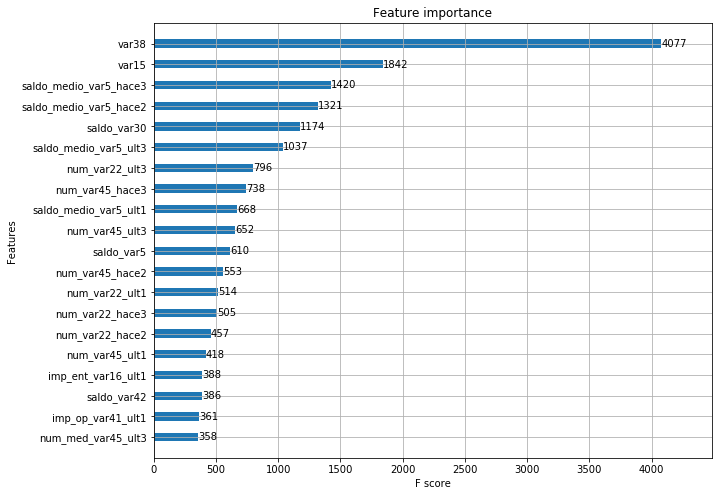

In [111]:
# 피처 중요도 시각화

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

#### LightGBM로 예측하기

In [112]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC:{lgbm_roc_score:.4f}')

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[130]	valid_0's auc: 0.83605	valid_0's binary_logloss: 0.140835
[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC:0.8396


In [114]:
# 최적 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

# 수행속도 향상을 위해 트리갯수 200개로 제한
lgbm_clf = LGBMClassifier(n_estimators = 200)

params = {'num_leaves' : [32,64],
         'max_depth' : [128,160],
         'min_child_samples' : [60,100],
         'subsample' : [0.8,1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC : {lgbm_roc_score:.4f}')

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	va

[35]	valid_0's auc: 0.878266	valid_0's binary_logloss: 0.122861	valid_1's auc: 0.838604	valid_1's binary_logloss: 0.139413
[36]	valid_0's auc: 0.87885	valid_0's binary_logloss: 0.122635	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.139347
[37]	valid_0's auc: 0.879609	valid_0's binary_logloss: 0.12236	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139342
[38]	valid_0's auc: 0.879941	valid_0's binary_logloss: 0.12211	valid_1's auc: 0.838586	valid_1's binary_logloss: 0.139438
[39]	valid_0's auc: 0.880723	valid_0's binary_logloss: 0.121864	valid_1's auc: 0.838655	valid_1's binary_logloss: 0.139421
[40]	valid_0's auc: 0.881052	valid_0's binary_logloss: 0.121708	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.139358
[41]	valid_0's auc: 0.881719	valid_0's binary_logloss: 0.12146	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.139353
[42]	valid_0's auc: 0.882841	valid_0's binary_logloss: 0.121168	valid_1's auc: 0.83955	valid_1's binary_logloss: 0.139266
[43]	valid_0's auc: 0.88

[30]	valid_0's auc: 0.873557	valid_0's binary_logloss: 0.12443	valid_1's auc: 0.838392	valid_1's binary_logloss: 0.139581
[31]	valid_0's auc: 0.874202	valid_0's binary_logloss: 0.124188	valid_1's auc: 0.837993	valid_1's binary_logloss: 0.139633
[32]	valid_0's auc: 0.874831	valid_0's binary_logloss: 0.123929	valid_1's auc: 0.837759	valid_1's binary_logloss: 0.139651
[33]	valid_0's auc: 0.87536	valid_0's binary_logloss: 0.123718	valid_1's auc: 0.838121	valid_1's binary_logloss: 0.139601
[34]	valid_0's auc: 0.876098	valid_0's binary_logloss: 0.123446	valid_1's auc: 0.838127	valid_1's binary_logloss: 0.13959
[35]	valid_0's auc: 0.876685	valid_0's binary_logloss: 0.123227	valid_1's auc: 0.837767	valid_1's binary_logloss: 0.139632
[36]	valid_0's auc: 0.877273	valid_0's binary_logloss: 0.122984	valid_1's auc: 0.837941	valid_1's binary_logloss: 0.139635
[37]	valid_0's auc: 0.877868	valid_0's binary_logloss: 0.12276	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139578
[38]	valid_0's auc: 0

[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827202	valid_0's binary_logloss: 0.151081	valid_1's auc: 0.819989	valid_1's binary_logloss: 0.160086
[3]	valid_0's auc: 0.836893	valid_0's binary_logloss: 0.147219	valid_1's auc: 0.828833	valid_1's binary_logloss: 0.156403
[4]	valid_0's auc: 0.841451	valid_0's binary_logloss: 0.144211	valid_1's auc: 0.830881	valid_1's binary_logloss: 0.153547
[5]	valid_0's auc: 0.843957	valid_0's binary_logloss: 0.141696	valid_1's auc: 0.832819	valid_1's binary_logloss: 0.151227
[6]	valid_0's auc: 0.847748	valid_0's binary_logloss: 0.139678	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.149329
[7]	valid_0's auc: 0.849327	valid_0's binary_logloss: 0.137985	valid_1's auc: 0.836739	valid_1's binary_logloss: 0.147839
[8]	valid_0's auc: 0.850907	valid_0's binary_logloss: 0.136536	valid_1's auc: 0.83671

[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151187	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160088
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.828121	valid_1's binary_logloss: 0.156608
[4]	valid_0's auc: 0.840507	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.831883	valid_1's binary_logloss: 0.153573
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141763	valid_1's auc: 0.834129	valid_1's binary_logloss: 0.151258
[6]	valid_0's auc: 0.84495	valid_0's binary_logloss: 0.139749	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149359
[7]	valid_0's auc: 0.845803	valid_0's binary_logloss: 0.138082	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.847136	valid_0's binary_logloss: 0.136693	valid_1's auc: 0.836717	v

[11]	valid_0's auc: 0.867991	valid_0's binary_logloss: 0.130246	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.14443
[12]	valid_0's auc: 0.868905	valid_0's binary_logloss: 0.129245	valid_1's auc: 0.834913	valid_1's binary_logloss: 0.143794
[13]	valid_0's auc: 0.871383	valid_0's binary_logloss: 0.128279	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.143188
[14]	valid_0's auc: 0.872929	valid_0's binary_logloss: 0.127403	valid_1's auc: 0.833943	valid_1's binary_logloss: 0.142967
[15]	valid_0's auc: 0.87404	valid_0's binary_logloss: 0.126607	valid_1's auc: 0.833167	valid_1's binary_logloss: 0.142812
[16]	valid_0's auc: 0.875242	valid_0's binary_logloss: 0.12587	valid_1's auc: 0.832607	valid_1's binary_logloss: 0.142587
[17]	valid_0's auc: 0.876378	valid_0's binary_logloss: 0.125177	valid_1's auc: 0.83187	valid_1's binary_logloss: 0.142458
[18]	valid_0's auc: 0.877407	valid_0's binary_logloss: 0.124483	valid_1's auc: 0.83163	valid_1's binary_logloss: 0.142321
[19]	valid_0's auc: 0

[39]	valid_0's auc: 0.898947	valid_0's binary_logloss: 0.114705	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140754
[40]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.114409	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.140759
[41]	valid_0's auc: 0.900418	valid_0's binary_logloss: 0.114104	valid_1's auc: 0.833244	valid_1's binary_logloss: 0.140854
[42]	valid_0's auc: 0.901143	valid_0's binary_logloss: 0.113727	valid_1's auc: 0.83271	valid_1's binary_logloss: 0.14096
[43]	valid_0's auc: 0.901603	valid_0's binary_logloss: 0.113493	valid_1's auc: 0.832882	valid_1's binary_logloss: 0.141012
Early stopping, best iteration is:
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.142313
[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839231	valid_0's binary_l

[21]	valid_0's auc: 0.881003	valid_0's binary_logloss: 0.122681	valid_1's auc: 0.830093	valid_1's binary_logloss: 0.142018
[22]	valid_0's auc: 0.882219	valid_0's binary_logloss: 0.122144	valid_1's auc: 0.829706	valid_1's binary_logloss: 0.141898
[23]	valid_0's auc: 0.883017	valid_0's binary_logloss: 0.121633	valid_1's auc: 0.829552	valid_1's binary_logloss: 0.14183
[24]	valid_0's auc: 0.883934	valid_0's binary_logloss: 0.121216	valid_1's auc: 0.829498	valid_1's binary_logloss: 0.14176
[25]	valid_0's auc: 0.885463	valid_0's binary_logloss: 0.120698	valid_1's auc: 0.828588	valid_1's binary_logloss: 0.141833
[26]	valid_0's auc: 0.886554	valid_0's binary_logloss: 0.120291	valid_1's auc: 0.8285	valid_1's binary_logloss: 0.141817
[27]	valid_0's auc: 0.887374	valid_0's binary_logloss: 0.119825	valid_1's auc: 0.828014	valid_1's binary_logloss: 0.141826
[28]	valid_0's auc: 0.888077	valid_0's binary_logloss: 0.11942	valid_1's auc: 0.827886	valid_1's binary_logloss: 0.14177
[29]	valid_0's auc: 0.

[11]	valid_0's auc: 0.86587	valid_0's binary_logloss: 0.130164	valid_1's auc: 0.836347	valid_1's binary_logloss: 0.14376
[12]	valid_0's auc: 0.867975	valid_0's binary_logloss: 0.129168	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143155
[13]	valid_0's auc: 0.870558	valid_0's binary_logloss: 0.128157	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.142684
[14]	valid_0's auc: 0.872242	valid_0's binary_logloss: 0.127255	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.142312
[15]	valid_0's auc: 0.873758	valid_0's binary_logloss: 0.126426	valid_1's auc: 0.836377	valid_1's binary_logloss: 0.14194
[16]	valid_0's auc: 0.875262	valid_0's binary_logloss: 0.125659	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.141765
[17]	valid_0's auc: 0.876886	valid_0's binary_logloss: 0.124929	valid_1's auc: 0.835566	valid_1's binary_logloss: 0.141548
[18]	valid_0's auc: 0.878549	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.835682	valid_1's binary_logloss: 0.141281
[19]	valid_0's auc:

[34]	valid_0's auc: 0.873431	valid_0's binary_logloss: 0.12451	valid_1's auc: 0.833313	valid_1's binary_logloss: 0.140097
[35]	valid_0's auc: 0.873806	valid_0's binary_logloss: 0.124316	valid_1's auc: 0.833176	valid_1's binary_logloss: 0.140105
[36]	valid_0's auc: 0.874204	valid_0's binary_logloss: 0.124118	valid_1's auc: 0.833063	valid_1's binary_logloss: 0.140129
[37]	valid_0's auc: 0.874899	valid_0's binary_logloss: 0.1239	valid_1's auc: 0.83378	valid_1's binary_logloss: 0.140005
[38]	valid_0's auc: 0.875362	valid_0's binary_logloss: 0.123685	valid_1's auc: 0.833865	valid_1's binary_logloss: 0.140011
[39]	valid_0's auc: 0.875966	valid_0's binary_logloss: 0.123474	valid_1's auc: 0.833771	valid_1's binary_logloss: 0.139979
[40]	valid_0's auc: 0.876345	valid_0's binary_logloss: 0.123322	valid_1's auc: 0.833508	valid_1's binary_logloss: 0.140044
[41]	valid_0's auc: 0.876848	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.833816	valid_1's binary_logloss: 0.139998
[42]	valid_0's auc: 

[25]	valid_0's auc: 0.868263	valid_0's binary_logloss: 0.12663	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140197
[26]	valid_0's auc: 0.868968	valid_0's binary_logloss: 0.126317	valid_1's auc: 0.836987	valid_1's binary_logloss: 0.140127
[27]	valid_0's auc: 0.869684	valid_0's binary_logloss: 0.126031	valid_1's auc: 0.837221	valid_1's binary_logloss: 0.140054
[28]	valid_0's auc: 0.870355	valid_0's binary_logloss: 0.125747	valid_1's auc: 0.837362	valid_1's binary_logloss: 0.13997
[29]	valid_0's auc: 0.871186	valid_0's binary_logloss: 0.12547	valid_1's auc: 0.837231	valid_1's binary_logloss: 0.139918
[30]	valid_0's auc: 0.871902	valid_0's binary_logloss: 0.125224	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139873
[31]	valid_0's auc: 0.872311	valid_0's binary_logloss: 0.124989	valid_1's auc: 0.83717	valid_1's binary_logloss: 0.139847
[32]	valid_0's auc: 0.872917	valid_0's binary_logloss: 0.12477	valid_1's auc: 0.837439	valid_1's binary_logloss: 0.139784
[33]	valid_0's auc: 0

[13]	valid_0's auc: 0.854721	valid_0's binary_logloss: 0.132319	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.142504
[14]	valid_0's auc: 0.85546	valid_0's binary_logloss: 0.131677	valid_1's auc: 0.838268	valid_1's binary_logloss: 0.142058
[15]	valid_0's auc: 0.856819	valid_0's binary_logloss: 0.131046	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.141834
[16]	valid_0's auc: 0.857561	valid_0's binary_logloss: 0.130517	valid_1's auc: 0.83725	valid_1's binary_logloss: 0.141464
[17]	valid_0's auc: 0.858305	valid_0's binary_logloss: 0.129992	valid_1's auc: 0.837057	valid_1's binary_logloss: 0.141205
[18]	valid_0's auc: 0.859993	valid_0's binary_logloss: 0.129467	valid_1's auc: 0.836921	valid_1's binary_logloss: 0.140976
[19]	valid_0's auc: 0.86106	valid_0's binary_logloss: 0.129012	valid_1's auc: 0.83589	valid_1's binary_logloss: 0.140875
[20]	valid_0's auc: 0.862262	valid_0's binary_logloss: 0.128583	valid_1's auc: 0.83514	valid_1's binary_logloss: 0.140788
[21]	valid_0's auc: 0

[36]	valid_0's auc: 0.875729	valid_0's binary_logloss: 0.123737	valid_1's auc: 0.839216	valid_1's binary_logloss: 0.139225
[37]	valid_0's auc: 0.876555	valid_0's binary_logloss: 0.123474	valid_1's auc: 0.839126	valid_1's binary_logloss: 0.139239
Early stopping, best iteration is:
[7]	valid_0's auc: 0.850111	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.840232	valid_1's binary_logloss: 0.147468
[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827905	valid_0's binary_logloss: 0.151337	valid_1's auc: 0.82145	valid_1's binary_logloss: 0.160211
[3]	valid_0's auc: 0.837862	valid_0's binary_logloss: 0.147478	valid_1's auc: 0.828696	valid_1's binary_logloss: 0.156489
[4]	valid_0's auc: 0.840611	valid_0's binary_logloss: 0.144436	valid_1's auc: 0.831962	valid_1's binary_logloss: 0.153536
[5]	valid_0's auc: 0.843113	valid_0's binary_loglo

[67]	valid_0's auc: 0.887341	valid_0's binary_logloss: 0.118646	valid_1's auc: 0.837935	valid_1's binary_logloss: 0.139839
[68]	valid_0's auc: 0.887601	valid_0's binary_logloss: 0.118505	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.139839
[69]	valid_0's auc: 0.887954	valid_0's binary_logloss: 0.11833	valid_1's auc: 0.83787	valid_1's binary_logloss: 0.139867
[70]	valid_0's auc: 0.888114	valid_0's binary_logloss: 0.118209	valid_1's auc: 0.837718	valid_1's binary_logloss: 0.139919
[71]	valid_0's auc: 0.888481	valid_0's binary_logloss: 0.118049	valid_1's auc: 0.837821	valid_1's binary_logloss: 0.139893
[72]	valid_0's auc: 0.888835	valid_0's binary_logloss: 0.117903	valid_1's auc: 0.837731	valid_1's binary_logloss: 0.139952
[73]	valid_0's auc: 0.889134	valid_0's binary_logloss: 0.117758	valid_1's auc: 0.837899	valid_1's binary_logloss: 0.139962
[74]	valid_0's auc: 0.889144	valid_0's binary_logloss: 0.117691	valid_1's auc: 0.83792	valid_1's binary_logloss: 0.13998
[75]	valid_0's auc: 

[11]	valid_0's auc: 0.867378	valid_0's binary_logloss: 0.131005	valid_1's auc: 0.838939	valid_1's binary_logloss: 0.142985
[12]	valid_0's auc: 0.868402	valid_0's binary_logloss: 0.130046	valid_1's auc: 0.837922	valid_1's binary_logloss: 0.142418
[13]	valid_0's auc: 0.869713	valid_0's binary_logloss: 0.12914	valid_1's auc: 0.838282	valid_1's binary_logloss: 0.141868
[14]	valid_0's auc: 0.870702	valid_0's binary_logloss: 0.128307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.141374
[15]	valid_0's auc: 0.871975	valid_0's binary_logloss: 0.127523	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.140933
[16]	valid_0's auc: 0.873071	valid_0's binary_logloss: 0.126793	valid_1's auc: 0.838163	valid_1's binary_logloss: 0.140591
[17]	valid_0's auc: 0.874334	valid_0's binary_logloss: 0.126108	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.140362
[18]	valid_0's auc: 0.875627	valid_0's binary_logloss: 0.125531	valid_1's auc: 0.836977	valid_1's binary_logloss: 0.140249
[19]	valid_0's auc

[36]	valid_0's auc: 0.89242	valid_0's binary_logloss: 0.117642	valid_1's auc: 0.836019	valid_1's binary_logloss: 0.139981
[37]	valid_0's auc: 0.893202	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.835858	valid_1's binary_logloss: 0.140014
[38]	valid_0's auc: 0.893881	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140116
[39]	valid_0's auc: 0.89439	valid_0's binary_logloss: 0.11671	valid_1's auc: 0.8355	valid_1's binary_logloss: 0.140166
[40]	valid_0's auc: 0.894767	valid_0's binary_logloss: 0.116439	valid_1's auc: 0.835564	valid_1's binary_logloss: 0.140175
[41]	valid_0's auc: 0.895261	valid_0's binary_logloss: 0.116161	valid_1's auc: 0.835399	valid_1's binary_logloss: 0.140228
[42]	valid_0's auc: 0.895782	valid_0's binary_logloss: 0.115888	valid_1's auc: 0.835369	valid_1's binary_logloss: 0.14032
[43]	valid_0's auc: 0.895994	valid_0's binary_logloss: 0.115655	valid_1's auc: 0.835382	valid_1's binary_logloss: 0.140379
[44]	valid_0's auc: 0.

[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842991	valid_0's binary_logloss: 0.150276	valid_1's auc: 0.827907	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851825	valid_0's binary_logloss: 0.146251	valid_1's auc: 0.832413	valid_1's binary_logloss: 0.155739
[4]	valid_0's auc: 0.854455	valid_0's binary_logloss: 0.143091	valid_1's auc: 0.833987	valid_1's binary_logloss: 0.15282
[5]	valid_0's auc: 0.857038	valid_0's binary_logloss: 0.140521	valid_1's auc: 0.836024	valid_1's binary_logloss: 0.150456
[6]	valid_0's auc: 0.859784	valid_0's binary_logloss: 0.138303	valid_1's auc: 0.836565	valid_1's binary_logloss: 0.148558
[7]	valid_0's auc: 0.861991	valid_0's binary_logloss: 0.13638	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.147071
[8]	valid_0's auc: 0.863742	valid_0's binary_logloss: 0.134702	valid_1's auc: 0.837366	

[28]	valid_0's auc: 0.886325	valid_0's binary_logloss: 0.120555	valid_1's auc: 0.837376	valid_1's binary_logloss: 0.139864
[29]	valid_0's auc: 0.887055	valid_0's binary_logloss: 0.120163	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.139938
[30]	valid_0's auc: 0.887923	valid_0's binary_logloss: 0.119761	valid_1's auc: 0.836813	valid_1's binary_logloss: 0.13991
[31]	valid_0's auc: 0.888783	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.836207	valid_1's binary_logloss: 0.139954
[32]	valid_0's auc: 0.889881	valid_0's binary_logloss: 0.118999	valid_1's auc: 0.836409	valid_1's binary_logloss: 0.139895
[33]	valid_0's auc: 0.890577	valid_0's binary_logloss: 0.118666	valid_1's auc: 0.836063	valid_1's binary_logloss: 0.139943
[34]	valid_0's auc: 0.891155	valid_0's binary_logloss: 0.118351	valid_1's auc: 0.836137	valid_1's binary_logloss: 0.139964
[35]	valid_0's auc: 0.891785	valid_0's binary_logloss: 0.118001	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.139945
[36]	valid_0's auc

[35]	valid_0's auc: 0.877285	valid_0's binary_logloss: 0.123033	valid_1's auc: 0.833868	valid_1's binary_logloss: 0.140083
[36]	valid_0's auc: 0.877822	valid_0's binary_logloss: 0.122827	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.140161
[37]	valid_0's auc: 0.87835	valid_0's binary_logloss: 0.122582	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.140133
[38]	valid_0's auc: 0.878728	valid_0's binary_logloss: 0.122378	valid_1's auc: 0.833827	valid_1's binary_logloss: 0.140119
[39]	valid_0's auc: 0.879195	valid_0's binary_logloss: 0.122177	valid_1's auc: 0.833696	valid_1's binary_logloss: 0.140111
Early stopping, best iteration is:
[9]	valid_0's auc: 0.850098	valid_0's binary_logloss: 0.135283	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.144934
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827202	valid_0's binary_lo

[67]	valid_0's auc: 0.891558	valid_0's binary_logloss: 0.117199	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.139951
[68]	valid_0's auc: 0.891842	valid_0's binary_logloss: 0.117047	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139964
[69]	valid_0's auc: 0.892333	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140006
[70]	valid_0's auc: 0.892833	valid_0's binary_logloss: 0.116695	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.139965
[71]	valid_0's auc: 0.892846	valid_0's binary_logloss: 0.116607	valid_1's auc: 0.837642	valid_1's binary_logloss: 0.140063
[72]	valid_0's auc: 0.892948	valid_0's binary_logloss: 0.116525	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.140129
Early stopping, best iteration is:
[42]	valid_0's auc: 0.882841	valid_0's binary_logloss: 0.121168	valid_1's auc: 0.83955	valid_1's binary_logloss: 0.139266
[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_lo

[12]	valid_0's auc: 0.854898	valid_0's binary_logloss: 0.132408	valid_1's auc: 0.838961	valid_1's binary_logloss: 0.142828
[13]	valid_0's auc: 0.855877	valid_0's binary_logloss: 0.131678	valid_1's auc: 0.839079	valid_1's binary_logloss: 0.142265
[14]	valid_0's auc: 0.857256	valid_0's binary_logloss: 0.130972	valid_1's auc: 0.838458	valid_1's binary_logloss: 0.14192
[15]	valid_0's auc: 0.85849	valid_0's binary_logloss: 0.130365	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141638
[16]	valid_0's auc: 0.859518	valid_0's binary_logloss: 0.129795	valid_1's auc: 0.837919	valid_1's binary_logloss: 0.141266
[17]	valid_0's auc: 0.86107	valid_0's binary_logloss: 0.129246	valid_1's auc: 0.837675	valid_1's binary_logloss: 0.141008
[18]	valid_0's auc: 0.862382	valid_0's binary_logloss: 0.128764	valid_1's auc: 0.83754	valid_1's binary_logloss: 0.140844
[19]	valid_0's auc: 0.86341	valid_0's binary_logloss: 0.128294	valid_1's auc: 0.836495	valid_1's binary_logloss: 0.140732
[20]	valid_0's auc: 0

[43]	valid_0's auc: 0.883416	valid_0's binary_logloss: 0.120936	valid_1's auc: 0.839046	valid_1's binary_logloss: 0.139368
[44]	valid_0's auc: 0.883946	valid_0's binary_logloss: 0.120707	valid_1's auc: 0.839079	valid_1's binary_logloss: 0.139372
[45]	valid_0's auc: 0.884413	valid_0's binary_logloss: 0.120517	valid_1's auc: 0.839058	valid_1's binary_logloss: 0.139355
[46]	valid_0's auc: 0.884779	valid_0's binary_logloss: 0.120366	valid_1's auc: 0.839074	valid_1's binary_logloss: 0.139393
[47]	valid_0's auc: 0.885151	valid_0's binary_logloss: 0.120167	valid_1's auc: 0.838763	valid_1's binary_logloss: 0.139448
[48]	valid_0's auc: 0.885423	valid_0's binary_logloss: 0.120017	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.13953
[49]	valid_0's auc: 0.885803	valid_0's binary_logloss: 0.119829	valid_1's auc: 0.83829	valid_1's binary_logloss: 0.139561
[50]	valid_0's auc: 0.886174	valid_0's binary_logloss: 0.119647	valid_1's auc: 0.838535	valid_1's binary_logloss: 0.139549
[51]	valid_0's auc

[40]	valid_0's auc: 0.879406	valid_0's binary_logloss: 0.122038	valid_1's auc: 0.838825	valid_1's binary_logloss: 0.139475
[41]	valid_0's auc: 0.87982	valid_0's binary_logloss: 0.121865	valid_1's auc: 0.838607	valid_1's binary_logloss: 0.139525
[42]	valid_0's auc: 0.880217	valid_0's binary_logloss: 0.121697	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.139582
[43]	valid_0's auc: 0.881131	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.838519	valid_1's binary_logloss: 0.139571
[44]	valid_0's auc: 0.881502	valid_0's binary_logloss: 0.121268	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.13955
[45]	valid_0's auc: 0.881982	valid_0's binary_logloss: 0.121081	valid_1's auc: 0.83858	valid_1's binary_logloss: 0.139559
[46]	valid_0's auc: 0.88233	valid_0's binary_logloss: 0.120906	valid_1's auc: 0.838247	valid_1's binary_logloss: 0.139657
[47]	valid_0's auc: 0.882781	valid_0's binary_logloss: 0.120707	valid_1's auc: 0.838252	valid_1's binary_logloss: 0.139655
[48]	valid_0's auc: 

[10]	valid_0's auc: 0.867095	valid_0's binary_logloss: 0.131167	valid_1's auc: 0.83568	valid_1's binary_logloss: 0.144312
[11]	valid_0's auc: 0.868321	valid_0's binary_logloss: 0.130032	valid_1's auc: 0.836598	valid_1's binary_logloss: 0.143512
[12]	valid_0's auc: 0.870342	valid_0's binary_logloss: 0.128915	valid_1's auc: 0.836786	valid_1's binary_logloss: 0.142896
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.142313
[14]	valid_0's auc: 0.873492	valid_0's binary_logloss: 0.127074	valid_1's auc: 0.837308	valid_1's binary_logloss: 0.141918
[15]	valid_0's auc: 0.874714	valid_0's binary_logloss: 0.126249	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.141545
[16]	valid_0's auc: 0.876498	valid_0's binary_logloss: 0.125412	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.141306
[17]	valid_0's auc: 0.877697	valid_0's binary_logloss: 0.124674	valid_1's auc: 0.835667	valid_1's binary_logloss: 0.141243
[18]	valid_0's au

[32]	valid_0's auc: 0.893404	valid_0's binary_logloss: 0.117315	valid_1's auc: 0.834945	valid_1's binary_logloss: 0.140444
[33]	valid_0's auc: 0.894165	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.834973	valid_1's binary_logloss: 0.140407
[34]	valid_0's auc: 0.895202	valid_0's binary_logloss: 0.116504	valid_1's auc: 0.835507	valid_1's binary_logloss: 0.140299
[35]	valid_0's auc: 0.896193	valid_0's binary_logloss: 0.116137	valid_1's auc: 0.835906	valid_1's binary_logloss: 0.140215
[36]	valid_0's auc: 0.896674	valid_0's binary_logloss: 0.115852	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.140177
[37]	valid_0's auc: 0.897433	valid_0's binary_logloss: 0.115534	valid_1's auc: 0.836293	valid_1's binary_logloss: 0.140099
[38]	valid_0's auc: 0.897849	valid_0's binary_logloss: 0.115209	valid_1's auc: 0.835887	valid_1's binary_logloss: 0.140252
[39]	valid_0's auc: 0.898318	valid_0's binary_logloss: 0.114876	valid_1's auc: 0.835559	valid_1's binary_logloss: 0.140398
[40]	valid_0's a

[19]	valid_0's auc: 0.880151	valid_0's binary_logloss: 0.123324	valid_1's auc: 0.836858	valid_1's binary_logloss: 0.14069
[20]	valid_0's auc: 0.88214	valid_0's binary_logloss: 0.122647	valid_1's auc: 0.83574	valid_1's binary_logloss: 0.140681
[21]	valid_0's auc: 0.883119	valid_0's binary_logloss: 0.12205	valid_1's auc: 0.83555	valid_1's binary_logloss: 0.140627
[22]	valid_0's auc: 0.884243	valid_0's binary_logloss: 0.121526	valid_1's auc: 0.83609	valid_1's binary_logloss: 0.140488
[23]	valid_0's auc: 0.885369	valid_0's binary_logloss: 0.120992	valid_1's auc: 0.835781	valid_1's binary_logloss: 0.140443
[24]	valid_0's auc: 0.886215	valid_0's binary_logloss: 0.120502	valid_1's auc: 0.835501	valid_1's binary_logloss: 0.140363
[25]	valid_0's auc: 0.887513	valid_0's binary_logloss: 0.119975	valid_1's auc: 0.835926	valid_1's binary_logloss: 0.140274
[26]	valid_0's auc: 0.888713	valid_0's binary_logloss: 0.119497	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.140329
[27]	valid_0's auc: 0.

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82918	valid_0's binary_logloss: 0.151167	valid_1's auc: 0.823351	valid_1's binary_logloss: 0.160065
[3]	valid_0's auc: 0.836091	valid_0's binary_logloss: 0.147411	valid_1's auc: 0.828685	valid_1's binary_logloss: 0.156507
[4]	valid_0's auc: 0.840405	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.833022	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.843736	valid_0's binary_logloss: 0.142035	valid_1's auc: 0.835479	valid_1's binary_logloss: 0.151317
[6]	valid_0's auc: 0.844764	valid_0's binary_logloss: 0.140147	valid_1's auc: 0.836468	valid_1's binary_logloss: 0.149464
[7]	valid_0's auc: 0.847121	valid_0's binary_logloss: 0.138474	valid_1's auc: 0.836468	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.847736	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.837728	

[23]	valid_0's auc: 0.866427	valid_0's binary_logloss: 0.127109	valid_1's auc: 0.839501	valid_1's binary_logloss: 0.13974
[24]	valid_0's auc: 0.86716	valid_0's binary_logloss: 0.126769	valid_1's auc: 0.83965	valid_1's binary_logloss: 0.13959
[25]	valid_0's auc: 0.868035	valid_0's binary_logloss: 0.126454	valid_1's auc: 0.839131	valid_1's binary_logloss: 0.139583
[26]	valid_0's auc: 0.869021	valid_0's binary_logloss: 0.126125	valid_1's auc: 0.839022	valid_1's binary_logloss: 0.139492
[27]	valid_0's auc: 0.869695	valid_0's binary_logloss: 0.125839	valid_1's auc: 0.839262	valid_1's binary_logloss: 0.139453
[28]	valid_0's auc: 0.870113	valid_0's binary_logloss: 0.125557	valid_1's auc: 0.839245	valid_1's binary_logloss: 0.139366
[29]	valid_0's auc: 0.870833	valid_0's binary_logloss: 0.125297	valid_1's auc: 0.839149	valid_1's binary_logloss: 0.139358
[30]	valid_0's auc: 0.871919	valid_0's binary_logloss: 0.125018	valid_1's auc: 0.838964	valid_1's binary_logloss: 0.139376
[31]	valid_0's auc: 

[55]	valid_0's auc: 0.884574	valid_0's binary_logloss: 0.120214	valid_1's auc: 0.838054	valid_1's binary_logloss: 0.139613
[56]	valid_0's auc: 0.885034	valid_0's binary_logloss: 0.120016	valid_1's auc: 0.838201	valid_1's binary_logloss: 0.139564
[57]	valid_0's auc: 0.885329	valid_0's binary_logloss: 0.119848	valid_1's auc: 0.838183	valid_1's binary_logloss: 0.139573
[58]	valid_0's auc: 0.885429	valid_0's binary_logloss: 0.119733	valid_1's auc: 0.838352	valid_1's binary_logloss: 0.139566
[59]	valid_0's auc: 0.885751	valid_0's binary_logloss: 0.119583	valid_1's auc: 0.838177	valid_1's binary_logloss: 0.139641
[60]	valid_0's auc: 0.885952	valid_0's binary_logloss: 0.119461	valid_1's auc: 0.838373	valid_1's binary_logloss: 0.139615
[61]	valid_0's auc: 0.886123	valid_0's binary_logloss: 0.119357	valid_1's auc: 0.838135	valid_1's binary_logloss: 0.139644
[62]	valid_0's auc: 0.886592	valid_0's binary_logloss: 0.119218	valid_1's auc: 0.83826	valid_1's binary_logloss: 0.139648
[63]	valid_0's au

[42]	valid_0's auc: 0.877347	valid_0's binary_logloss: 0.12293	valid_1's auc: 0.833974	valid_1's binary_logloss: 0.140003
Early stopping, best iteration is:
[12]	valid_0's auc: 0.853454	valid_0's binary_logloss: 0.133039	valid_1's auc: 0.839037	valid_1's binary_logloss: 0.143056
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830001	valid_0's binary_logloss: 0.151107	valid_1's auc: 0.82337	valid_1's binary_logloss: 0.15968
[3]	valid_0's auc: 0.839573	valid_0's binary_logloss: 0.147324	valid_1's auc: 0.83264	valid_1's binary_logloss: 0.156063
[4]	valid_0's auc: 0.842992	valid_0's binary_logloss: 0.144391	valid_1's auc: 0.83608	valid_1's binary_logloss: 0.153143
[5]	valid_0's auc: 0.845713	valid_0's binary_logloss: 0.141966	valid_1's auc: 0.838479	valid_1's binary_logloss: 0.150779
[6]	valid_0's auc: 0.848508	valid_0's binary_logloss:

[34]	valid_0's auc: 0.874128	valid_0's binary_logloss: 0.124274	valid_1's auc: 0.837524	valid_1's binary_logloss: 0.139762
[35]	valid_0's auc: 0.874804	valid_0's binary_logloss: 0.12402	valid_1's auc: 0.837469	valid_1's binary_logloss: 0.139751
[36]	valid_0's auc: 0.875352	valid_0's binary_logloss: 0.123792	valid_1's auc: 0.83736	valid_1's binary_logloss: 0.139769
[37]	valid_0's auc: 0.87599	valid_0's binary_logloss: 0.123559	valid_1's auc: 0.837238	valid_1's binary_logloss: 0.139757
[38]	valid_0's auc: 0.876681	valid_0's binary_logloss: 0.123367	valid_1's auc: 0.837375	valid_1's binary_logloss: 0.139742
[39]	valid_0's auc: 0.877229	valid_0's binary_logloss: 0.123176	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.139777
[40]	valid_0's auc: 0.877783	valid_0's binary_logloss: 0.122931	valid_1's auc: 0.837245	valid_1's binary_logloss: 0.139728
[41]	valid_0's auc: 0.878412	valid_0's binary_logloss: 0.122698	valid_1's auc: 0.837189	valid_1's binary_logloss: 0.139754
[42]	valid_0's auc:

[19]	valid_0's auc: 0.875136	valid_0's binary_logloss: 0.125371	valid_1's auc: 0.832742	valid_1's binary_logloss: 0.141507
[20]	valid_0's auc: 0.876197	valid_0's binary_logloss: 0.124814	valid_1's auc: 0.832569	valid_1's binary_logloss: 0.141376
[21]	valid_0's auc: 0.877286	valid_0's binary_logloss: 0.124265	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141369
[22]	valid_0's auc: 0.878351	valid_0's binary_logloss: 0.12376	valid_1's auc: 0.831493	valid_1's binary_logloss: 0.141291
[23]	valid_0's auc: 0.87915	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.831944	valid_1's binary_logloss: 0.141173
[24]	valid_0's auc: 0.88009	valid_0's binary_logloss: 0.122817	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141183
[25]	valid_0's auc: 0.881183	valid_0's binary_logloss: 0.12235	valid_1's auc: 0.831519	valid_1's binary_logloss: 0.141142
[26]	valid_0's auc: 0.882242	valid_0's binary_logloss: 0.121911	valid_1's auc: 0.83122	valid_1's binary_logloss: 0.141125
[27]	valid_0's auc: 0

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842399	valid_0's binary_logloss: 0.150505	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.159789
[3]	valid_0's auc: 0.847465	valid_0's binary_logloss: 0.146325	valid_1's auc: 0.830964	valid_1's binary_logloss: 0.155994
[4]	valid_0's auc: 0.850024	valid_0's binary_logloss: 0.14313	valid_1's auc: 0.831698	valid_1's binary_logloss: 0.153168
[5]	valid_0's auc: 0.853487	valid_0's binary_logloss: 0.140492	valid_1's auc: 0.834088	valid_1's binary_logloss: 0.150751
[6]	valid_0's auc: 0.855865	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.834424	valid_1's binary_logloss: 0.148857
[7]	valid_0's auc: 0.857298	valid_0's binary_logloss: 0.136482	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.147407
[8]	valid_0's auc: 0.858957	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.835673	v

[11]	valid_0's auc: 0.865337	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835265	valid_1's binary_logloss: 0.144026
[12]	valid_0's auc: 0.86681	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.835596	valid_1's binary_logloss: 0.143395
[13]	valid_0's auc: 0.868736	valid_0's binary_logloss: 0.129392	valid_1's auc: 0.835221	valid_1's binary_logloss: 0.142859
[14]	valid_0's auc: 0.870248	valid_0's binary_logloss: 0.128555	valid_1's auc: 0.835178	valid_1's binary_logloss: 0.142419
[15]	valid_0's auc: 0.87138	valid_0's binary_logloss: 0.127833	valid_1's auc: 0.834834	valid_1's binary_logloss: 0.14216
[16]	valid_0's auc: 0.872373	valid_0's binary_logloss: 0.127151	valid_1's auc: 0.834648	valid_1's binary_logloss: 0.141863
[17]	valid_0's auc: 0.873016	valid_0's binary_logloss: 0.126561	valid_1's auc: 0.83334	valid_1's binary_logloss: 0.141838
[18]	valid_0's auc: 0.874082	valid_0's binary_logloss: 0.125944	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.141517
[19]	valid_0's auc: 0

[34]	valid_0's auc: 0.892149	valid_0's binary_logloss: 0.118123	valid_1's auc: 0.836389	valid_1's binary_logloss: 0.139504
[35]	valid_0's auc: 0.892998	valid_0's binary_logloss: 0.117793	valid_1's auc: 0.836255	valid_1's binary_logloss: 0.139533
[36]	valid_0's auc: 0.89356	valid_0's binary_logloss: 0.117478	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.139523
[37]	valid_0's auc: 0.894086	valid_0's binary_logloss: 0.117177	valid_1's auc: 0.836152	valid_1's binary_logloss: 0.13956
[38]	valid_0's auc: 0.894901	valid_0's binary_logloss: 0.116796	valid_1's auc: 0.836268	valid_1's binary_logloss: 0.139585
[39]	valid_0's auc: 0.895733	valid_0's binary_logloss: 0.116504	valid_1's auc: 0.836498	valid_1's binary_logloss: 0.139544
[40]	valid_0's auc: 0.896306	valid_0's binary_logloss: 0.116196	valid_1's auc: 0.836675	valid_1's binary_logloss: 0.139553
[41]	valid_0's auc: 0.897067	valid_0's binary_logloss: 0.115849	valid_1's auc: 0.83661	valid_1's binary_logloss: 0.139607
Early stopping, bes

[1]	valid_0's auc: 0.824305	valid_0's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828884	valid_0's binary_logloss: 0.150957	valid_1's auc: 0.822387	valid_1's binary_logloss: 0.159711
[3]	valid_0's auc: 0.838845	valid_0's binary_logloss: 0.147117	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.156068
[4]	valid_0's auc: 0.843406	valid_0's binary_logloss: 0.144114	valid_1's auc: 0.834917	valid_1's binary_logloss: 0.153141
[5]	valid_0's auc: 0.846391	valid_0's binary_logloss: 0.141629	valid_1's auc: 0.837871	valid_1's binary_logloss: 0.150804
[6]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.13957	valid_1's auc: 0.839548	valid_1's binary_logloss: 0.148876
[7]	valid_0's auc: 0.851133	valid_0's binary_logloss: 0.137847	valid_1's auc: 0.841812	valid_1's binary_logloss: 0.147225
[8]	valid_0's auc: 0.852859	valid_0's binary_logloss: 0.136394	valid_1's auc: 0.842382

In [115]:
# 도출된 최적 하이퍼 파라미터 적용

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC : {lgbm_roc_score:.4f}')

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

## 캐글 신용카드 사기검출

#### 데이터 로드

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

card_df=pd.read_csv('creditcard/creditcard.csv')
print(card_df.shape)
card_df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [117]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### 데이터 1차 가공 및 데이터셋 분할

In [118]:
# 복사한 dfm의 time컬럼을 삭제하는 함수

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [119]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수

from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    # 학습 테스트 분할, 단 레이블은 stratify로 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state = 0, stratify = y_target)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [120]:
# 학습/테스트용 데이터 세트의 레이블 값 비율

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts() / y_train.shape[0] * 100)

print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


#### 평가

In [121]:
# 여러가지 평가 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print추가
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

In [122]:
# 로지스틱 회귀 모델

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149, F1:0.7222, AUC:0.9570


In [123]:
# 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아 학습/예측/평가를 수행하는 함수

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [124]:
# LightGBM 모델

from lightgbm import LGBMClassifier

# 극도로 불균형한 레이블 값 분포를 가질 시 boost_from_average를 False로 설정해 주어야 함
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568, F1:0.8421, AUC:0.9797


#### 데이터 재가공

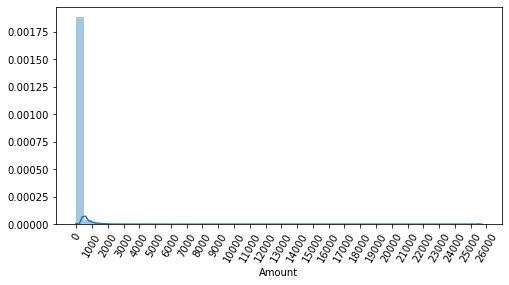

In [125]:
# 대부분의 선형모델은 중요 피처들의 값이 정규분포 형태를 유지하는 것을 선호

import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card_df['Amount'])

In [126]:
# get_proprocessed_df() 함수에 스케일링 기능 추가

from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 dfm 맨 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled', amount_n)
    # 불필요한 컬럼 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [127]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1:0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568, F1:0.8421, AUC:0.9773


In [128]:
# get_proprocessed_df() 함수에 StandardScaler 대신 로그변환으로 정규분포화

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p()를 이용, Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 dfm 맨 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled', amount_n)
    # 불필요한 컬럼 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [129]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1:0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1:0.8496, AUC:0.9786


#### 이상치 데이터 제거

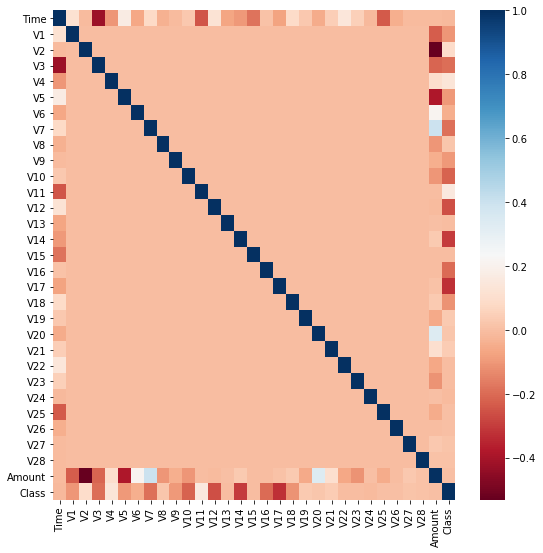

In [130]:
# 피처별 상관도를 시각화하기 위해 heatmap사용

import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

# 양의 상관관계가 높을 수록 진한 파란색, 음의 상관관계가 높을 수록 진한 빨간색

In [131]:
# 이상치 제거 함수

import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    #fraud에 해당하는 column 데이터만 추출, Q1과 Q3 지점을 np.percentile로 구함.
    fraud = df.loc[df['Class'] == 1, column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱해 최댓값 최솟값 지점 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정, dfm index반환
    outlier_index = fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    
    return outlier_index

In [132]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [133]:
# get_processed_df()를 로그변환 후 V14피처의 이상치 데이터를 삭제하는 로직으로 변경

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p()를 이용, Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 dfm 맨 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled', amount_n)
    # 불필요한 컬럼 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    
    return df_copy

In [134]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1:0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288, F1:0.8930, AUC:0.9831


#### SMOTE 오버 샘플링 적용

In [135]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
# 반드시 학습용 데이터에만 오버샘플링 적용
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처.레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처.레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처.레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처.레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
Name: Class, dtype: int64


In [136]:
# 로지스틱 회귀로 예측

lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

# 레이블 값1에 대한 학습을 많이 해서 test데이터 세트에서도 레이블을 1로 예측 -> 정밀도가 지나치게 낮아짐

오차행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247, F1:0.1023, AUC:0.9737


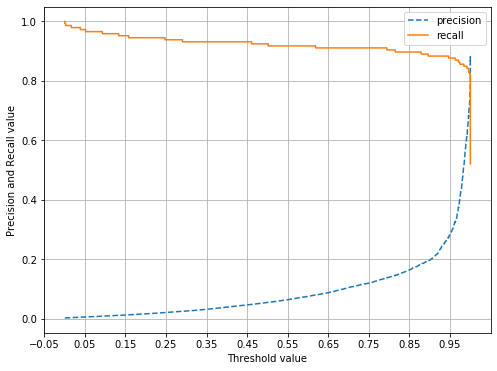

In [137]:
# 분류결정 임곗값에 따른 정밀도와 재현율 곡선 함수
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축을 저임ㄹ도, 재현율 값으로 각각 Plot 수행. 저임ㄹ도는 점선으로 표시
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y출 label과 legend, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [138]:
# LightGBM으로 예측

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves = 64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

# 좋은 SMOTE패키지 일수록 정밀도 감소율 억제, 재현율 증가율 증폭

오차행렬
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493, F1:0.8889, AUC:0.9789


## 스태킹 앙상블

#### 기본 스태킹 모델

In [139]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [140]:
# 개별 ML모델 생성

knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

In [141]:
# 개별 모델 학습

knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [142]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정

knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print(f'KNN 정확도:{accuracy_score(y_test, knn_pred):.4f}')
print(f'랜덤 포레스트 정확도:{accuracy_score(y_test, rf_pred):.4f}')
print(f'결정 트리 정확도:{accuracy_score(y_test, dt_pred):.4f}')
print(f'에이다부스트 정확도:{accuracy_score(y_test, ada_pred):.4f}')

KNN 정확도:0.9211
랜덤 포레스트 정확도:0.9649
결정 트리 정확도:0.9123
에이다부스트 정확도:0.9561


In [143]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듬
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [144]:
# 로지스틱 회귀로 최종 예측

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print(f'최종 메타 모델의 예측 정확도:{accuracy_score(y_test, final):.4f}')

최종 메타 모델의 예측 정확도:0.9737


#### cv 세트 기반의 스태킹 앙상블

In [145]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

#개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트:', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:,folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [146]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
RandomForestClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
DecisionTreeClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
AdaBoostClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작


In [147]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape :',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape :', Stack_final_X_train.shape,\
     '스태킹 테스트 피처 데이터 Shape :', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape : (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape : (455, 4) 스태킹 테스트 피처 데이터 Shape : (114, 4)


In [148]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print(f'최종 메타 모델의 예측 정확도:{accuracy_score(y_test, stack_final):.4f}')

최종 메타 모델의 예측 정확도:0.9737
